<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 139.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 166.9 MB/s eta 0:00:00


In [2]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 134.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 74.8 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-12-17 00:44:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  37.0MB/s    in 3.7s    

2025-12-17 00:44:23 (41.6 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



NaN Values: 
 JobSatPoints_6    35987
JobSatPoints_7    35989
Age                   0
dtype: int64 


Cleaned NaN Values: 
 JobSatPoints_6    0
JobSatPoints_7    0
Age               0
dtype: int64 




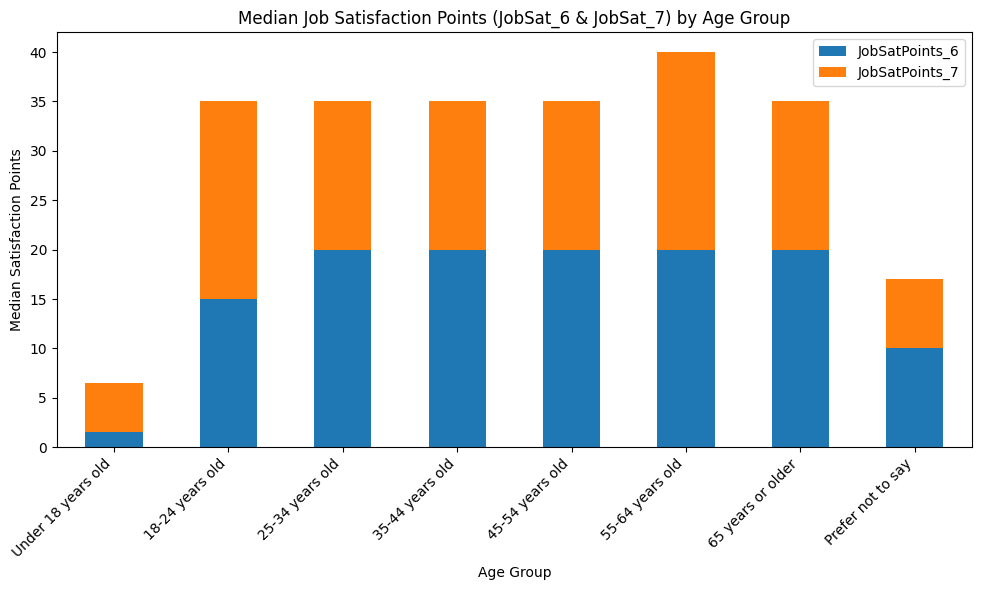

In [7]:
##Write your code here
## Find NaN Values and Drop
print("NaN Values: \n", df[['JobSatPoints_6', 'JobSatPoints_7', 'Age']].isnull().sum(), "\n\n")
df_a = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Age'])
print("Cleaned NaN Values: \n", df_a[['JobSatPoints_6', 'JobSatPoints_7', 'Age']].isnull().sum(), "\n\n")

## Group by Age and Compute Medians
median_scores = df_a.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

## Sort Age groups in order
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]
median_scores = median_scores.reindex(age_order)

median_scores.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Median Job Satisfaction Points (JobSat_6 & JobSat_7) by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Satisfaction Points')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


NaN Values: 
 JobSatPoints_6    35987
JobSatPoints_7    35989
Employment            0
dtype: int64 


Cleaned NaN Values: 
 JobSatPoints_6    0
JobSatPoints_7    0
Employment        0
dtype: int64 




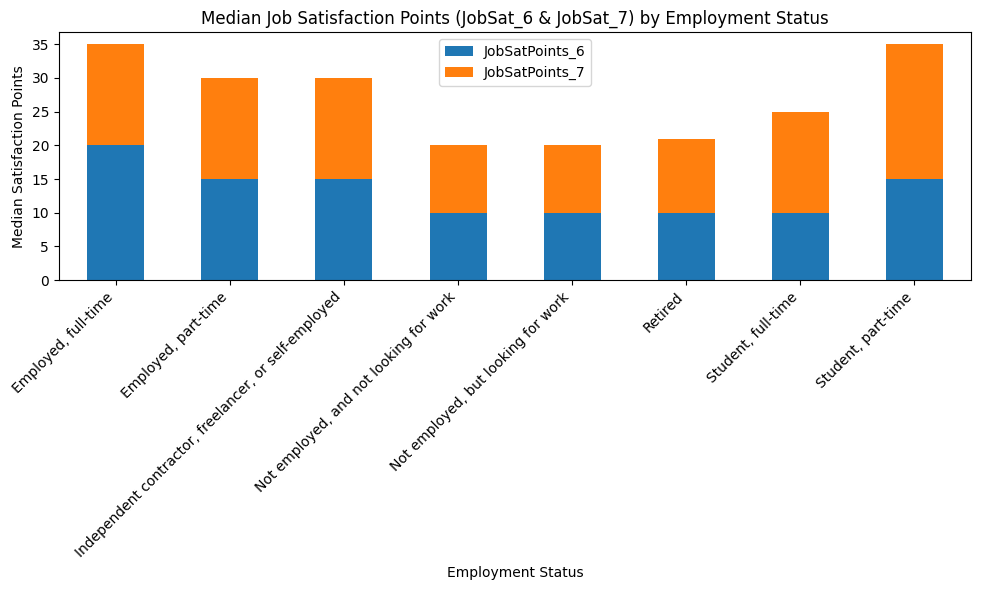

In [8]:
##Write your code here
## Find NaN Values and Drop
print("NaN Values: \n", df[['JobSatPoints_6', 'JobSatPoints_7', 'Employment']].isnull().sum(), "\n\n")
df_a = df.dropna(subset=['JobSatPoints_6', 'JobSatPoints_7', 'Employment'])
print("Cleaned NaN Values: \n", df_a[['JobSatPoints_6', 'JobSatPoints_7', 'Employment']].isnull().sum(), "\n\n")

## Split semi-colon separated values
df_b = df_a.assign(Emp=df_a['Employment'].str.split(';'))

## Explode Emp to one Employment status per row per respondent
df_b = df_b.explode('Emp')

## Clean up white space
df_b['Emp'] = df_b['Emp'].str.strip()

## Group by Emp and Compute Medians
median_scores = df_b.groupby('Emp')[['JobSatPoints_6', 'JobSatPoints_7']].median()

median_scores.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e']
)
plt.title('Median Job Satisfaction Points (JobSat_6 & JobSat_7) by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Median Satisfaction Points')
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


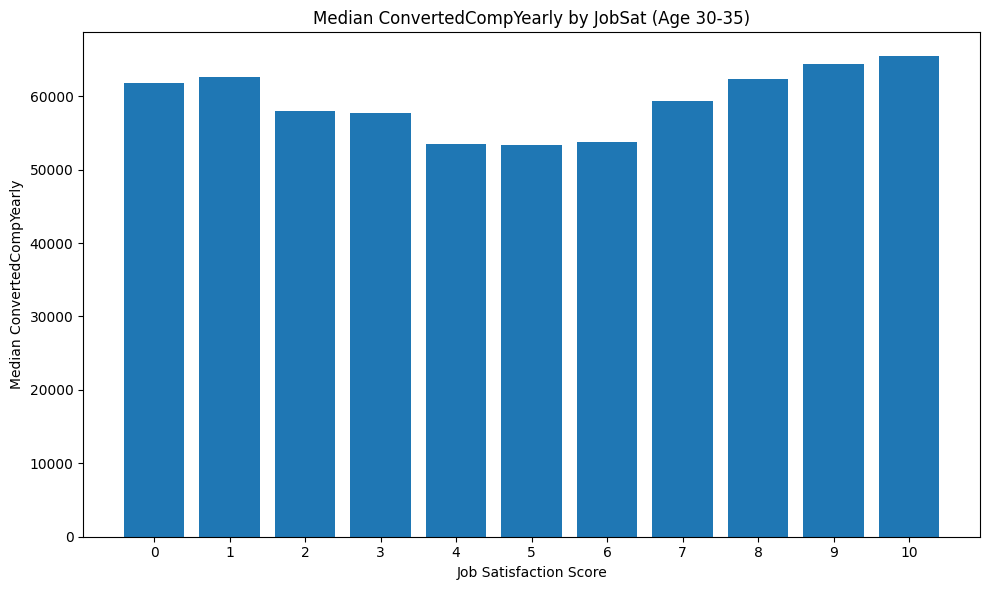

In [9]:
##Write your code here
## Drop NaN Values
df_a = df.dropna(subset=['ConvertedCompYearly', 'JobSat'])

## Drop top 5 outliers
top5 = df_a['ConvertedCompYearly'].nlargest(5).index
df_b = df_a.drop(top5)

## Ensure numeric types
df_b['ConvertedCompYearly'] = pd.to_numeric(df_b['ConvertedCompYearly'], errors='coerce')
df_b['JobSat'] = pd.to_numeric(df_b['JobSat'], errors='coerce')
df_b = df_b.dropna(subset=['ConvertedCompYearly', 'JobSat'])

## Filter Age group to 25-34 years old 
df_c = df_b[df_b['Age'] == '25-34 years old']

## Group by JobSat and compute median ConvertedCompYearly
grouped = df_c.groupby('JobSat')['ConvertedCompYearly'].median().reset_index()

## Plot bar chart
plt.figure(figsize=(10,6))
plt.bar(grouped['JobSat'], grouped['ConvertedCompYearly'], color='#1f77b4')

plt.title('Median ConvertedCompYearly by JobSat (Age 30-35)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Median ConvertedCompYearly')
plt.xticks(grouped['JobSat'])
plt.tight_layout()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


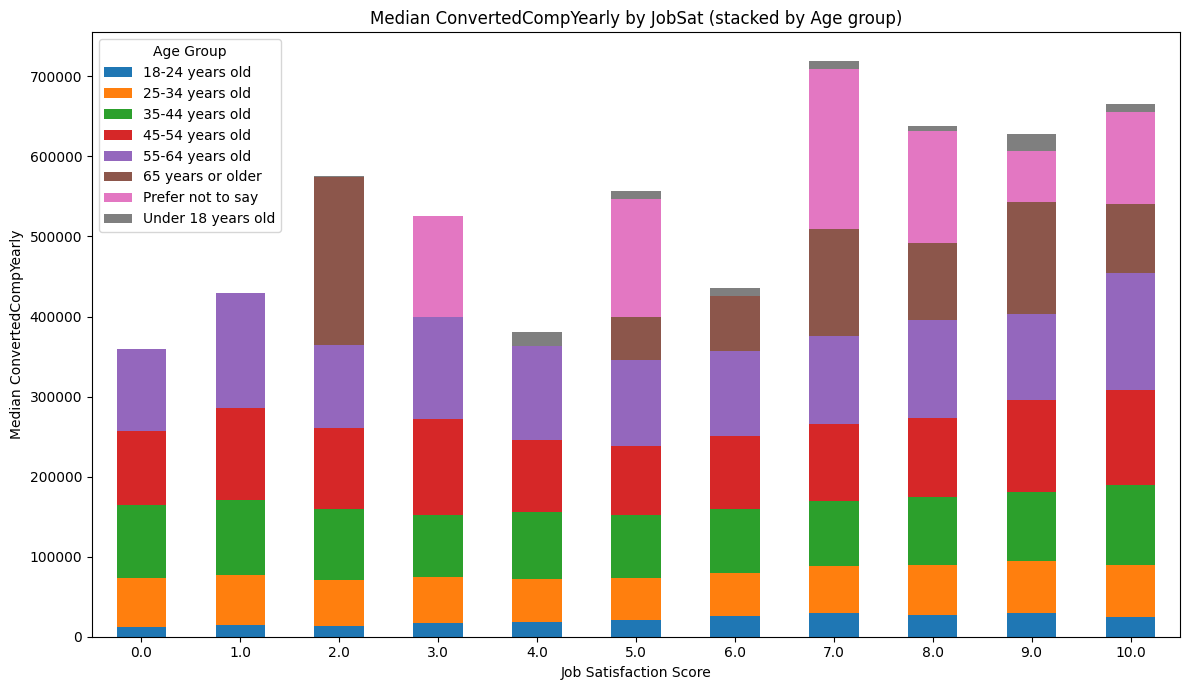

In [10]:
##Write your code here
## Drop NaN Values
df_a = df.dropna(subset=['JobSat', 'ConvertedCompYearly'])

## Drop top 5 outliers
top5 = df_a['ConvertedCompYearly'].nlargest(5).index
df_b = df_a.drop(top5)

## Ensure numeric types
df_b['ConvertedCompYearly'] = pd.to_numeric(df_b['ConvertedCompYearly'], errors='coerce')
df_b['JobSat'] = pd.to_numeric(df_b['JobSat'], errors='coerce')
df_b = df_b.dropna(subset=['ConvertedCompYearly', 'JobSat'])

##Group by JobSat and Age, and compute median ConvertedCompYearly
grouped = df_b.groupby(['JobSat', 'Age'])['ConvertedCompYearly'].median().reset_index()

## Pivot so JobSat is x-axis, and Age groups are stacked segments
pivot_df = grouped.pivot(index='JobSat', columns='Age', values='ConvertedCompYearly')

##Plot stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7)
)
plt.title('Median ConvertedCompYearly by JobSat (stacked by Age group)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Median ConvertedCompYearly')
plt.xticks(rotation=0)
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


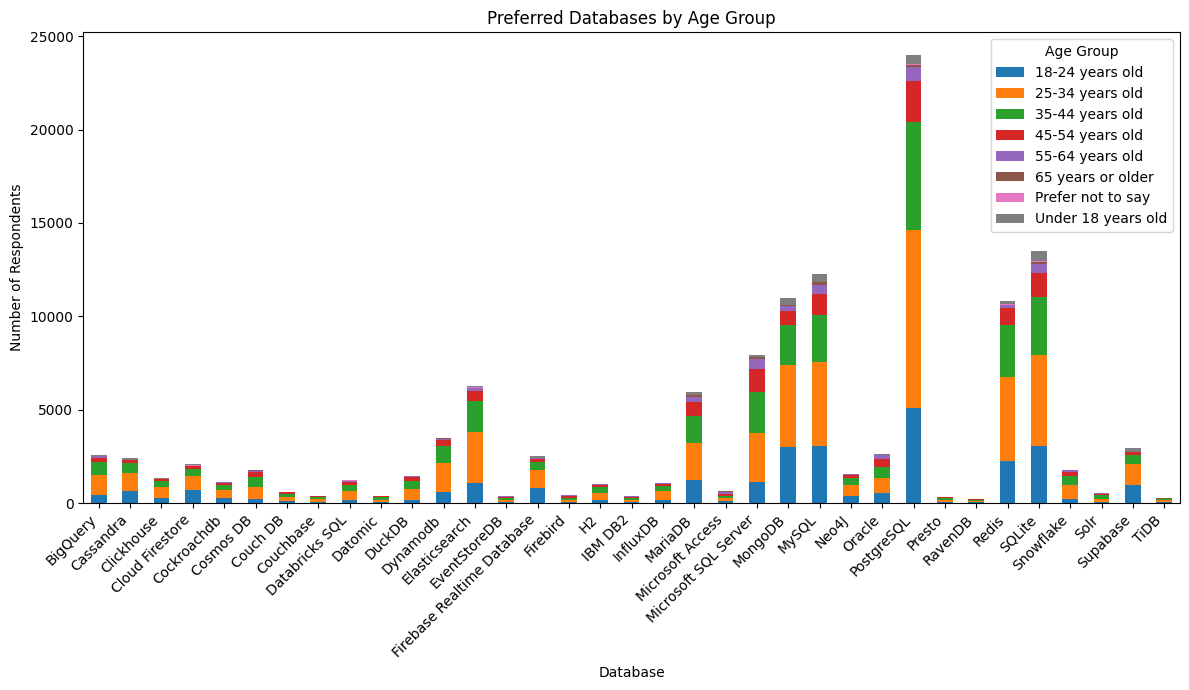

In [11]:
##Write your code here
## Drop NaN Values
df_a = df.dropna(subset=['DatabaseWantToWorkWith', 'Age'])

## Split semi-colon separated values
df_b = df_a.assign(Database=df_a['DatabaseWantToWorkWith'].str.split(';'))

## Explode Tools to one tool per row per respondent
df_b = df_b.explode('Database')

## Clean up white space
df_b['Database'] = df_b['Database'].str.strip()

##Group by Database and Age
grouped = df_b.groupby(['Database', 'Age']).size().reset_index(name='Count')

## Pivot so databases are rows, Age groups are columns
pivot_df = grouped.pivot(index='Database', columns='Age', values='Count').fillna(0)

pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 7)
)
plt.title('Preferred Databases by Age Group')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


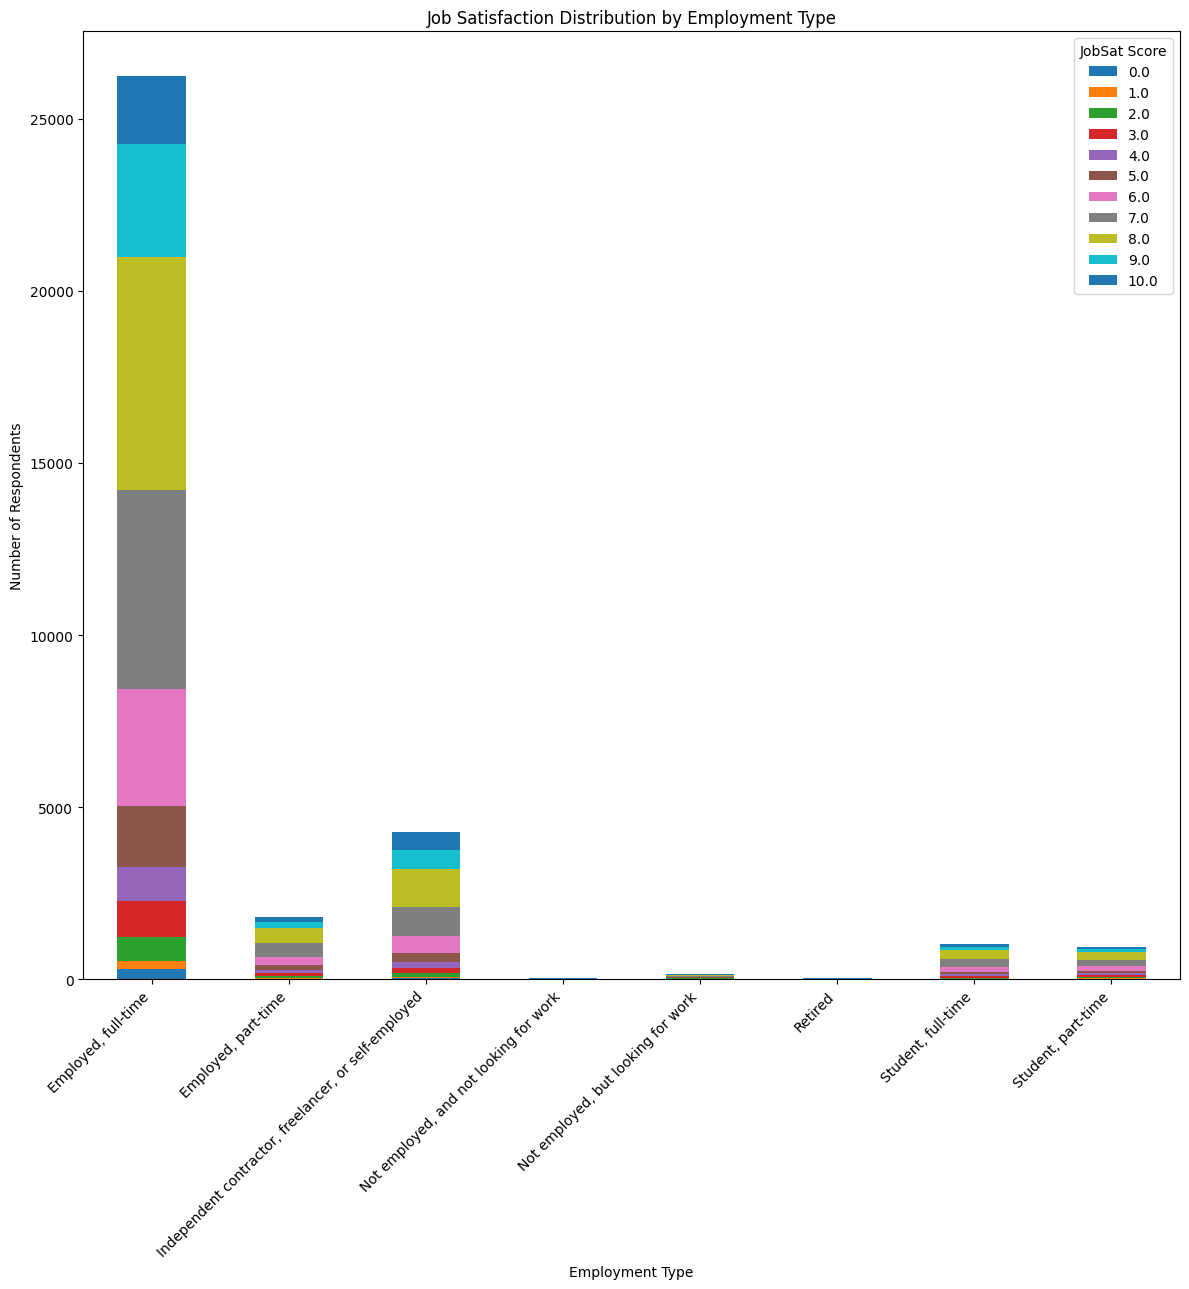

In [18]:
##Write your code here
## Drop NaN Values
df_a = df.dropna(subset=['Employment', 'JobSat'])

## Split semi-colon separated values
df_b = df_a.assign(Emp=df_a['Employment'].str.split(';'))

## Explode Tools to one tool per row per respondent
df_b = df_b.explode('Emp')

## Clean up white space
df_b['Emp'] = df_b['Emp'].str.strip()

## Group by Employment and JobSat, count respondents
grouped = df_b.groupby(['Emp', 'JobSat']).size().reset_index(name='Count')

## Pivot so Employment is x-axis, JobSat scores are stacked segments
pivot_df = grouped.pivot(index='Emp', columns='JobSat', values='Count').fillna(0)

## Plot stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 13)
)
plt.title('Job Satisfaction Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='JobSat Score')
plt.tight_layout()
plt.show()

### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


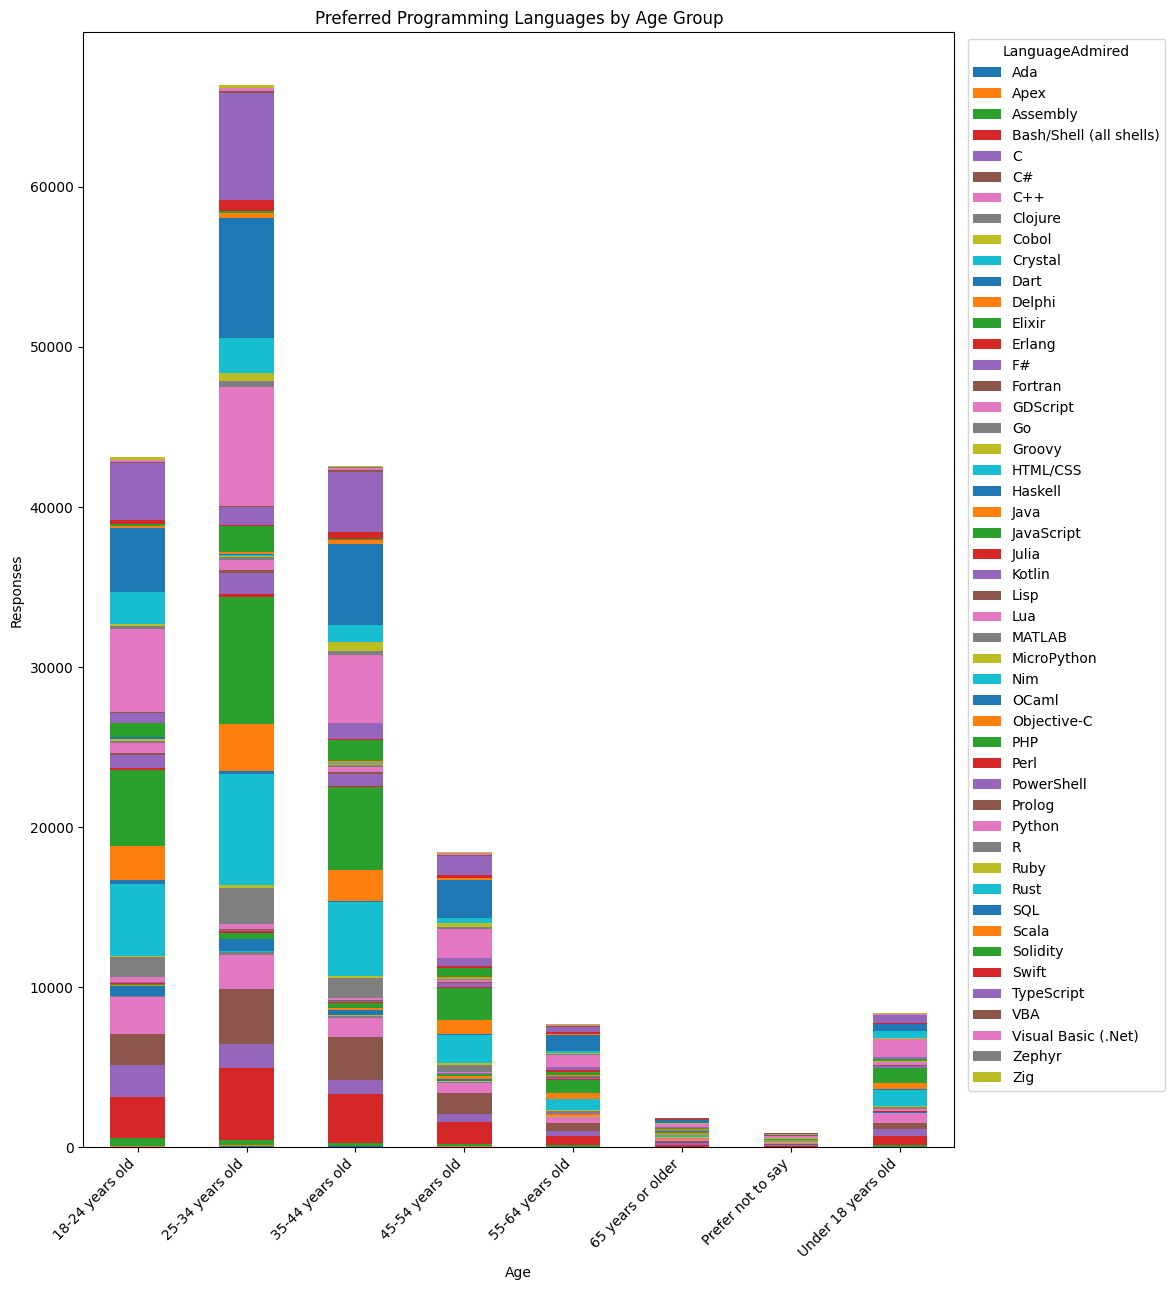

In [27]:
##Write your code here
## Drop NaN Values
df_a = df.dropna(subset=['LanguageAdmired', 'Age'])

## Split semi-colon separated values
df_b = df_a.assign(Language=df_a['LanguageAdmired'].str.split(';'))

## Explode Tools to one tool per row per respondent
df_b = df_b.explode('Language')

## Clean up white space
df_b['Language'] = df_b['Language'].str.strip()

## Group by Language and Age, count respondents
grouped = df_b.groupby(['Language', 'Age']).size().reset_index(name='Count')

## Pivot so Age is x-axis, Languages are stacked segments
pivot_df = grouped.pivot(index='Age', columns='Language', values='Count').fillna(0)

## Plot stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 13)
)
plt.title('Preferred Programming Languages by Age Group')
plt.xlabel('Age')
plt.ylabel('Responses')
plt.xticks(rotation=45, ha='right')
plt.legend(title='LanguageAdmired', bbox_to_anchor=(1.25, 1), loc='upper right')
plt.tight_layout()
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


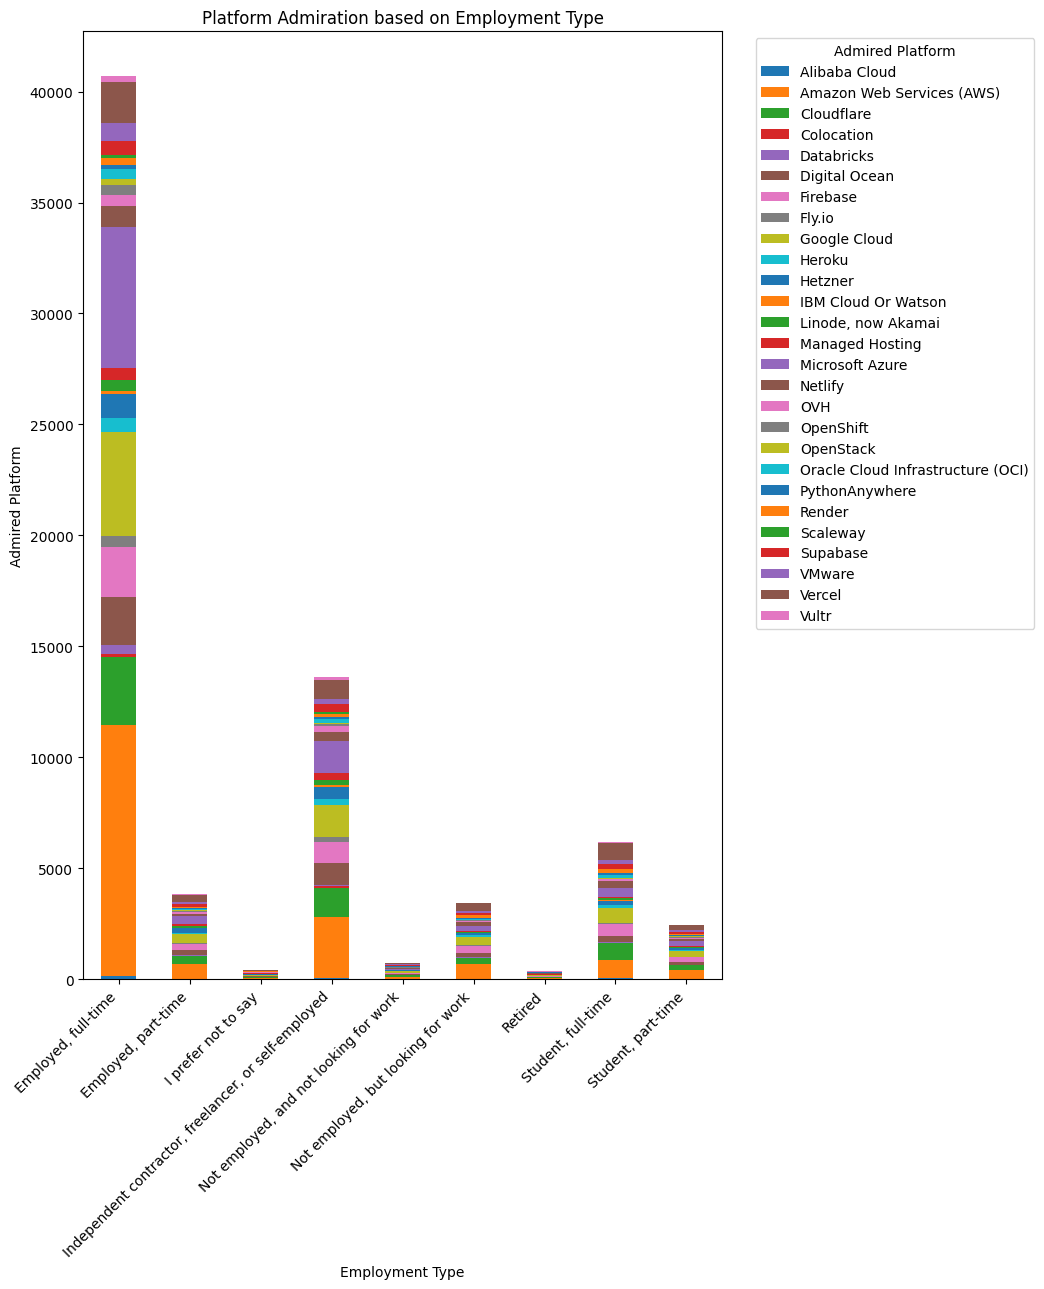

In [31]:
##Write your code here
## Drop NaN Values
df_a = df.dropna(subset=['PlatformAdmired', 'Employment'])

## Split semi-colon separated values
df_b = df_a.assign(Platform=df_a['PlatformAdmired'].str.split(';'))
df_c = df_b.assign(Emp=df_a['Employment'].str.split(';'))

## Explode Platform and Emp to one tool per row per respondent
df_c = df_c.explode('Platform')
df_c = df_c.explode('Emp')

## Clean up white space
df_c['Platform'] = df_c['Platform'].str.strip()
df_c['Emp'] = df_c['Emp'].str.strip()

## Group by Language and Age, count respondents
grouped = df_c.groupby(['Platform', 'Emp']).size().reset_index(name='Count')

## Pivot so Age is x-axis, Languages are stacked segments
pivot_df = grouped.pivot(index='Emp', columns='Platform', values='Count').fillna(0)

## Plot stacked bar chart
pivot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 13)
)
plt.title('Platform Admiration based on Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Admired Platform')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Admired Platform', bbox_to_anchor=(1.5, 1), loc='upper right')
plt.tight_layout()
plt.show()

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
